In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
matplotlib inline

In [4]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
simulator = my_provider.get_backend('ibmq_5_yorktown')

In [6]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [7]:
# Initializing the variables for B.
J = 0
h1 = -1
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])


# Running a simulation for each point
for i in range(n):
    qc_list = []
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)       
        qc_list.append(qc)
    transpiled_circs = transpile(qc_list, backend=simulator)
    job = execute(transpiled_circs, backend = simulator, shots=1000 )
    for circ_index in range(len(transpiled_circs)):
        counts = job.result().get_counts(qc_list[circ_index])
        res[i][circ_index][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                            int(counts.get('11', 0))])


In [8]:
print(res)

[[[278. 236. 241. 245.]
  [245. 246. 285. 224.]
  [256. 254. 258. 232.]
  ...
  [242. 259. 274. 225.]
  [226. 261. 283. 230.]
  [281. 242. 236. 241.]]

 [[300. 244. 228. 228.]
  [243. 239. 280. 238.]
  [271. 224. 237. 268.]
  ...
  [253. 242. 248. 257.]
  [270. 258. 224. 248.]
  [284. 219. 237. 260.]]

 [[283. 221. 232. 264.]
  [256. 240. 267. 237.]
  [261. 235. 257. 247.]
  ...
  [257. 229. 300. 214.]
  [257. 242. 269. 232.]
  [308. 270. 229. 193.]]

 ...

 [[251. 254. 247. 248.]
  [240. 237. 296. 227.]
  [278. 233. 269. 220.]
  ...
  [247. 224. 278. 251.]
  [261. 211. 259. 269.]
  [277. 237. 246. 240.]]

 [[277. 249. 245. 229.]
  [244. 237. 268. 251.]
  [276. 213. 278. 233.]
  ...
  [245. 226. 264. 265.]
  [241. 232. 269. 258.]
  [295. 219. 260. 226.]]

 [[275. 242. 251. 232.]
  [240. 237. 282. 241.]
  [273. 240. 263. 224.]
  ...
  [225. 234. 287. 254.]
  [236. 248. 285. 231.]
  [281. 221. 239. 259.]]]


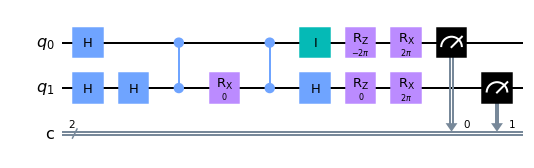

In [9]:
#Draw the current circuit
qc.draw(output='mpl')

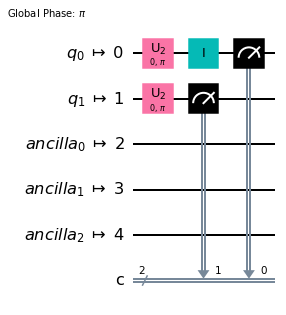

In [10]:
transpiled_circs[0].draw(output='mpl')

<AxesSubplot:>

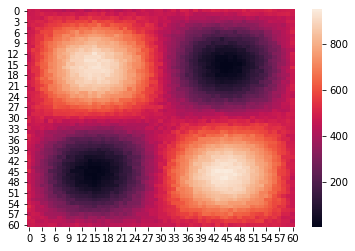

In [11]:
# Making a heatmap plot
sns.heatmap(res[:, :, 1]+res[:, :, 3])